In [34]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import SGDRegressor as sgd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor ,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [10]:
print(y)

      Rings
0        15
1         7
2         9
3        10
4         7
...     ...
4172     11
4173     10
4174      9
4175     10
4176     12

[4177 rows x 1 columns]


In [12]:
print(X)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  
0             0.1010        0.1500  
1             0.0485        0.0700  
2             0.1415        0.2100  
3             0.1140        0.1550 

In [31]:
X = pd.DataFrame(X)
Y = np.array(y)
feat = X.columns[:-1]

IndexError: single positional indexer is out-of-bounds

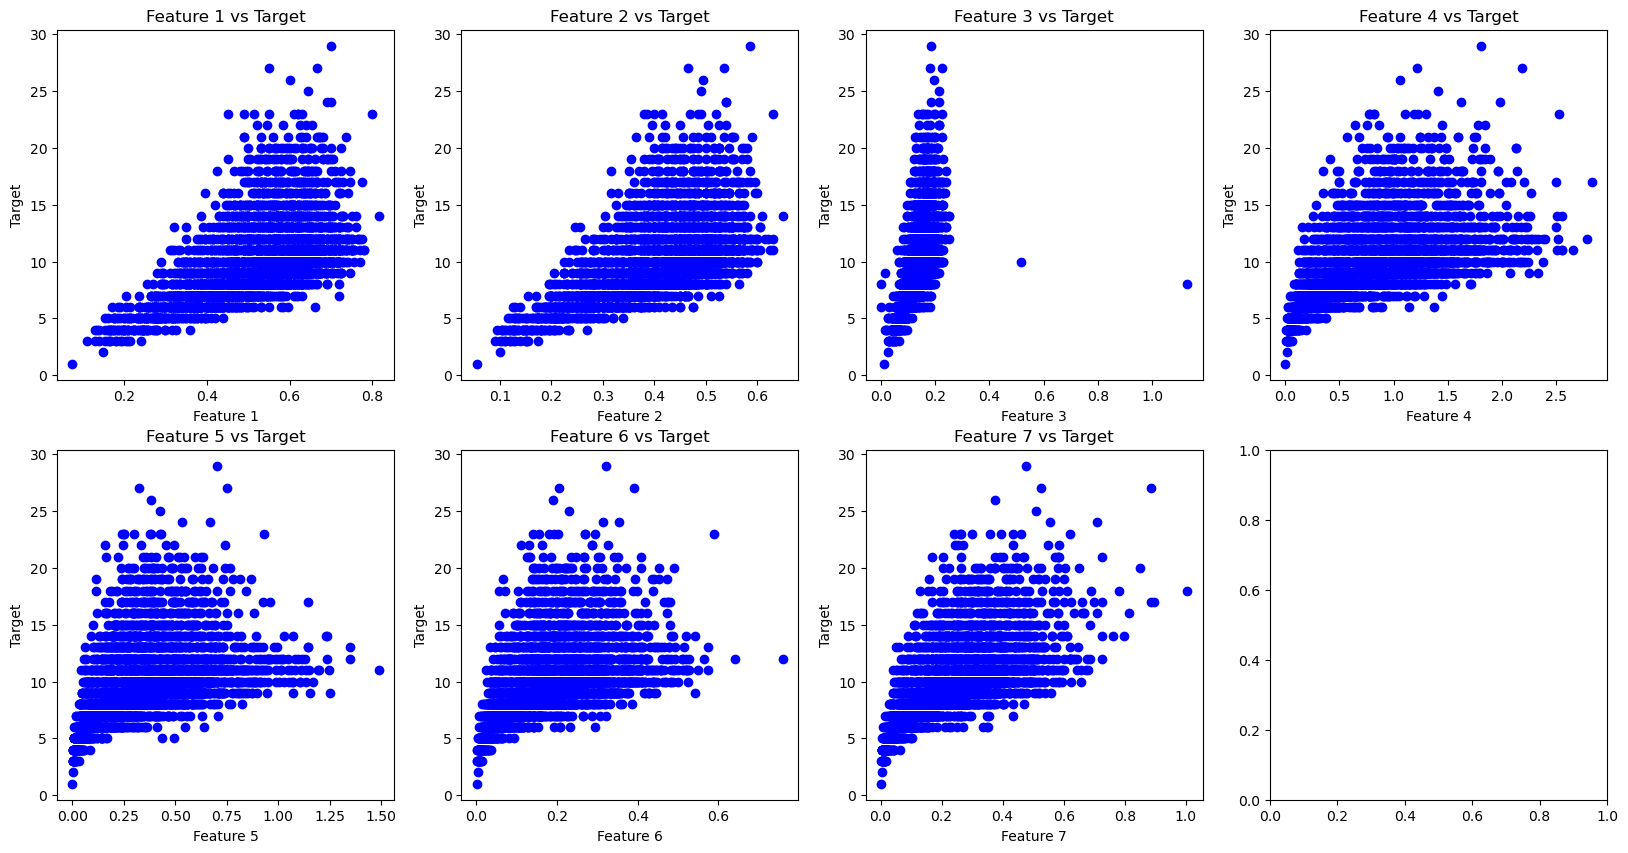

In [67]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
axs = axs.ravel()  # Flatten the 2D array of axes
for i in range(8):
    axs[i].scatter(X.iloc[:, i], y, color='blue')
    axs[i].set_title(f'Feature {i+1} vs Target')
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel('Target')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


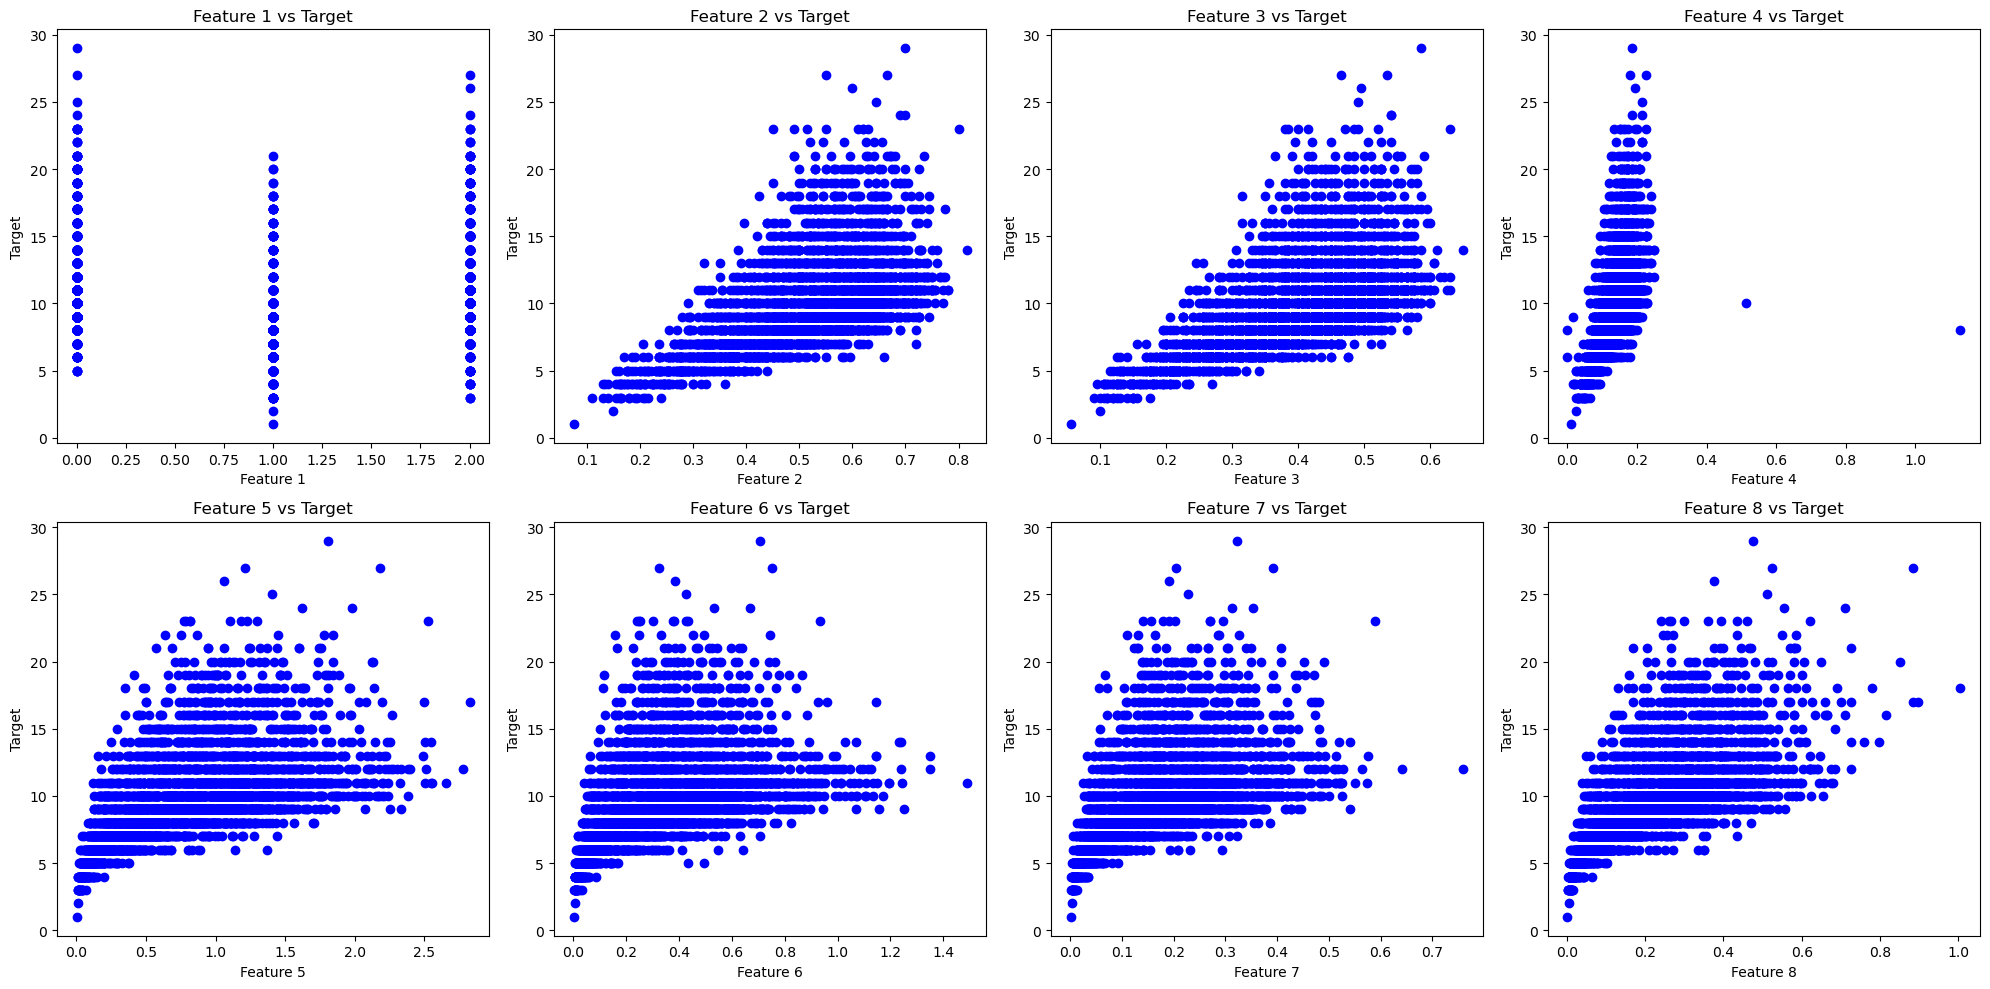

<Figure size 640x480 with 0 Axes>

In [46]:
le = LabelEncoder()
X['Sex']= le.fit_transform(X['Sex'])


ig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
axs = axs.ravel()  # Flatten the 2D array of axes
for i in range(8):
    axs[i].scatter(X.iloc[:, i], Y, color='blue')
    axs[i].set_title(f'Feature {i+1} vs Target')
    axs[i].set_xlabel(f'Feature {i+1}')
    axs[i].set_ylabel('Target')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [60]:
Y = Y.flatten()

y = pd.Series(Y)

# Calculate correlation coefficients
correlations = X.corrwith(pd.Series(y, name='Target'))

# Display the correlation coefficients
print(correlations)


Sex              -0.034627
Length            0.556720
Diameter          0.574660
Height            0.557467
Whole_weight      0.540390
Shucked_weight    0.420884
Viscera_weight    0.503819
Shell_weight      0.627574
dtype: float64


Since on the basis of above correlation , sex is negatively correlated with the number of rings , therefore it will be droppped 

In [63]:
X = X.drop(['Sex'],axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


Now , let us begin with model fitting , analysis , finding the best parameters for each model and compare with one another to get the best model for this dataset .